
# Actividad 2. Práctica 2. Redes Neuronales
---


Por: Ángela Daniela Córdoba Álvarez


---



Para programar redes neuronales podemos hacer uso de de tres métodos: *TensorFlow*, *Keras* y *Sklearn*.



1.   El primer paso es cargar el dataset o conjunto de datos especificado



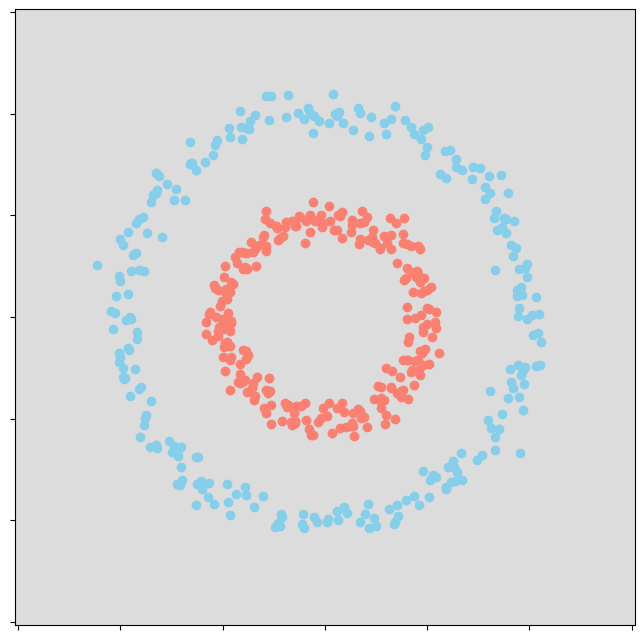

In [1]:
# Se importan las librerías necesarias
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

'''
Se crean datos artificiales, de modo que se pretende clasificar a dos anillos
concéntricos (comparten el mismo centro) de datos. Son datos que van a
formar dos anillos uno dentro del otro.
'''
X, Y = make_circles(n_samples=500, noise=0.05, factor=0.5)

# Resolución del mapa de predicción
res = 100 # Cantidad de puntos de la cuadrícula a lo largo del eje

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacío a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap='coolwarm', vmin=0, vmax=1)

# Visualización de la nube de datos
plt.scatter(X[Y == 0,0], X[Y == 0,1], c= "skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c= "salmon")

plt.tick_params(labelbottom=False, labelleft=False)



2.   Sabemos que las redes neuronales están inspiradas en el funcionamiento del cerebro humano, por tal razón, las unidades (neuronas, hablando biológicamente) toman valores de otras unidades, realizan cálculos respectivos y terminan pasando el nuevo valor como salida a otras unidades. Las unidades son colocadas en capas, lo cual forma la red.



Usando diferentes herramientas...

## TensorFlow:

Instructions for updating:
non-resource variables are not supported in the long term


Step 0 / 1000 - Loss = 0.44651827 - Acc = 0.532
Step 25 / 1000 - Loss = 0.4401057 - Acc = 0.518
Step 50 / 1000 - Loss = 0.4271037 - Acc = 0.516
Step 75 / 1000 - Loss = 0.358647 - Acc = 0.594
Step 100 / 1000 - Loss = 0.3226407 - Acc = 0.638
Step 125 / 1000 - Loss = 0.30204722 - Acc = 0.682
Step 150 / 1000 - Loss = 0.2888742 - Acc = 0.724
Step 175 / 1000 - Loss = 0.2780975 - Acc = 0.74
Step 200 / 1000 - Loss = 0.2652278 - Acc = 0.742
Step 225 / 1000 - Loss = 0.22301295 - Acc = 0.736
Step 250 / 1000 - Loss = 0.17752287 - Acc = 0.808
Step 275 / 1000 - Loss = 0.14424032 - Acc = 0.836
Step 300 / 1000 - Loss = 0.10698209 - Acc = 0.904
Step 325 / 1000 - Loss = 0.08393791 - Acc = 0.976
Step 350 / 1000 - Loss = 0.07119668 - Acc = 0.984
Step 375 / 1000 - Loss = 0.062028468 - Acc = 0.986
Step 400 / 1000 - Loss = 0.054512657 - Acc = 0.986
Step 425 / 1000 - Loss = 0.04824976 - Acc = 0.988
Step 450 / 1000 - Loss = 0.0429886 - Acc = 0.994
Step 475 / 1000 - Loss = 0.038529478 - Acc = 0.996
Step 500 / 1

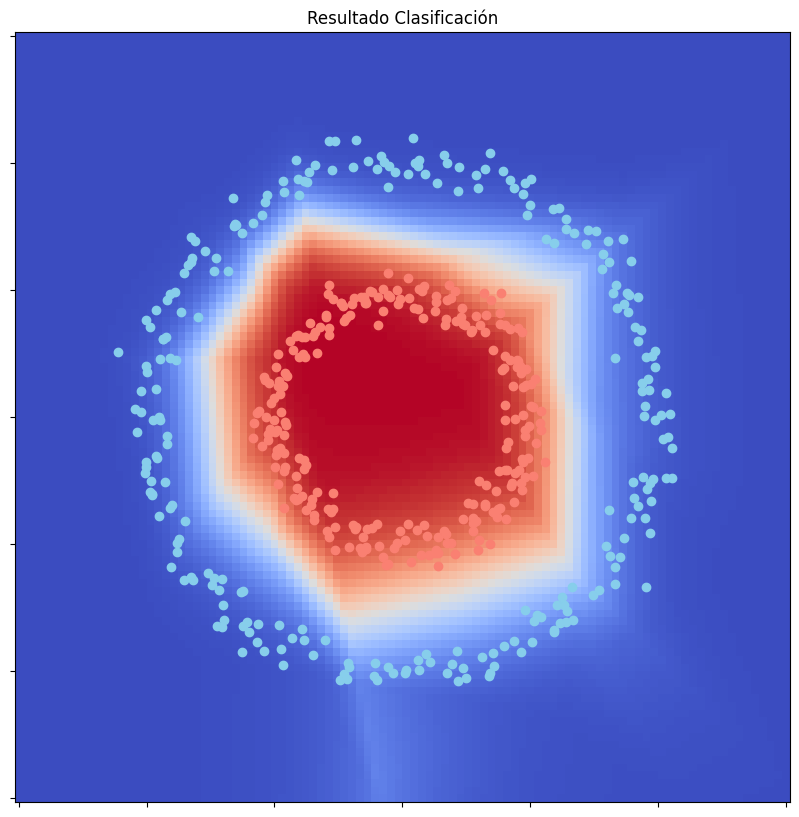

In [2]:
# Se importan librerías necesarias
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Se definen los puntos de entrada de la red para la matriz X e Y
iX = tf.placeholder('float', shape=[None, X.shape[1]]) # Placeholder para la entrada
iY = tf.placeholder('float', shape=[None]) # Placeholder para las etiquetas

lr = 0.01 # Learning rate
nn = [2, 16, 8, 1] # Número de neuronas en cada capa

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1') # Pesos
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1') # Biases
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1)) # Salida tras aplicas ReLU

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y tras aplicar la función de activación sigmoide
pY= tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY) # Función de pérdida que mide el error entre pred y etiq.

# Se define el optimizador de la red para que se minimice el error
# Minimiza la función de périda usando el descenso por gradiente
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de pasos para el entrenamiento
iPY = [] # Lista vacía para guardar la evolución de las predicciones (animación)

with tf.Session() as sess:

  # Se inicializan los parámetros de la red (matrices W y b)
  sess.run(tf.global_variables_initializer())

  # Se itera 'n' pases de entrenamiento
  for step in range(n_steps):
    '''
    Se evalúa el optimizador, la función de coste y el tensor de salida pY.
    La evaluación del optimizer producirá el entrenamiento de la red.
    '''
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})

    # Se imprimen métricas para cada 25 iteraciones
    if step % 25 == 0:
      acc = np.mean(np.round(_pY) == Y) # Cálculo del accuracy
      print('Step', step, '/', n_steps, '- Loss =', _loss, '- Acc =', acc)
      _pY = sess.run(pY, feed_dict={iX: _pX}).reshape((res, res)) # Predicciones para cada punto en _pX
      iPY.append(_pY) # Se guarda para visualizar la animación

# ----- Código de la animación ----- #
ims = [] # Lista que almacena las imágenes de cada fotograma
fig = plt.figure(figsize=(10, 10))
print("--- Generando animación ---")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap='coolwarm', animated=True)

  # Visualización número de datos
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c= "skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c= "salmon")

  plt.title("Resultado Clasificación")

  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())


## Keras:

In [3]:
'''
Se importan las librerías necesarias; pero se hace una adición y es sobre
herramientas de Tensorflow en cuanto a la optimización del código, ya que en
caso contrario, no deja ejecutar el código.
'''

import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD as SGDL

from IPython.core.display import display, HTML

lr = 0.01 # Learning rate
nn = [2, 16, 8, 1] # Número de neuronas en cada capa

'''
Se crea el objeto que contendrá a la red neuronal como secuencia de capas
'''
model = kr.Sequential()

# Se añade la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Se añade la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Se añade la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Se compila el modelo, definiendo la función de coste y el optimizador
model.compile(loss='mse', optimizer= SGDL(lr=0.05), metrics=['acc'])

# Se entrena el modelo (callbacks)
model.fit(X, Y, epochs=100)


Train on 500 samples


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
500/500 [==============================] - 0s 133us/sample - loss: 0.2442 - acc: 0.5540
Epoch 2/100
500/500 [==============================] - 0s 65us/sample - loss: 0.2422 - acc: 0.5460
Epoch 3/100
500/500 [==============================] - 0s 43us/sample - loss: 0.2403 - acc: 0.6100
Epoch 4/100
500/500 [==============================] - 0s 43us/sample - loss: 0.2385 - acc: 0.5960
Epoch 5/100
500/500 [==============================] - 0s 45us/sample - loss: 0.2363 - acc: 0.7080
Epoch 6/100
500/500 [==============================] - 0s 51us/sample - loss: 0.2343 - acc: 0.7020
Epoch 7/100
500/500 [==============================] - 0s 49us/sample - loss: 0.2322 - acc: 0.6920
Epoch 8/100
500/500 [==============================] - 0s 46us/sample - loss: 0.2297 - acc: 0.7760
Epoch 9/100
500/500 [==============================] - 0s 49us/sample - loss: 0.2268 - acc: 0.8000
Epoch 10/100
500/500 [==============================] - 0s 56us/sample - loss: 0.2241 - acc: 0.7900
Epoch 11

## Sklearn:

In [4]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01 # Learning rate
nn = [2, 16, 8, 1] # Número de neuronas en cada capa

# Se crea el objeto del modelo de red neuronal multicapa
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size=64)

# Se entrena el modelo
clf.fit(X, Y)

Iteration 1, loss = 0.98637499
Iteration 2, loss = 0.28256011
Iteration 3, loss = 0.13155202
Iteration 4, loss = 0.13014332
Iteration 5, loss = 0.13641505
Iteration 6, loss = 0.13091128
Iteration 7, loss = 0.12607258
Iteration 8, loss = 0.12502966
Iteration 9, loss = 0.12521969
Iteration 10, loss = 0.12520944
Iteration 11, loss = 0.12510221
Iteration 12, loss = 0.12508873
Iteration 13, loss = 0.12508541
Iteration 14, loss = 0.12508395
Iteration 15, loss = 0.12504698
Iteration 16, loss = 0.12507496
Iteration 17, loss = 0.12506338
Iteration 18, loss = 0.12511892
Iteration 19, loss = 0.12505704
Iteration 20, loss = 0.12502483
Iteration 21, loss = 0.12509638
Iteration 22, loss = 0.12508364
Iteration 23, loss = 0.12507261
Iteration 24, loss = 0.12504131
Iteration 25, loss = 0.12512912
Iteration 26, loss = 0.12521051
Iteration 27, loss = 0.12503907
Iteration 28, loss = 0.12507012
Iteration 29, loss = 0.12515728
Iteration 30, loss = 0.12503954
Iteration 31, loss = 0.12505340
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)